In [5]:
import easyocr
import cv2
import matplotlib.pyplot as plt
import json
import os
from pathlib import Path
from tqdm import tqdm

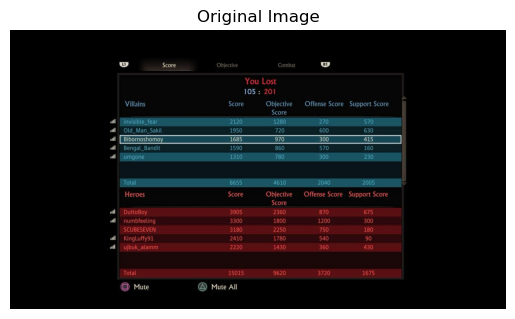

In [6]:
# Load and display the source image
img_path = './data/test_2.jpg'
image = cv2.imread(img_path)
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image_rgb)
plt.axis('off')
plt.title('Original Image')
plt.show()

In [7]:
def extract_game_data(image_path):
    # Initialize OCR reader
    reader = easyocr.Reader(['en'], gpu=False)
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
        
    # Initialize easy_ocr, and only record information with a confidence > 60% accuracy.
    results = reader.readtext(image_rgb)
    texts = [text for (_, text, prob) in results if prob > 0.6]
    
    # Extract match result and score
    try:
        result_index = texts.index("You Lost")
        result = "You Lost"
        score = f"{texts[result_index + 1]} : {texts[result_index + 2]}"
    except:
        result = "Unknown"
        score = "?"
    
    # Group words into rows: [name, score1, score2, score3, score4]
    structured_rows = []
    temp_row = []

    for item in texts:
        if item.lower() in ["total", "score", "objective", "support", "offense", ]:
            continue
        if item.replace('_', '').isalnum() and not item.isdigit():
            if temp_row:
                structured_rows.append(temp_row)
                temp_row = []
            temp_row = [item]
        elif item.isdigit():
            temp_row.append(int(item))
            if len(temp_row) == 5:
                structured_rows.append(temp_row)
                temp_row = []

    # assign teams
    teams = {}
    current_team = None

    for row in structured_rows:
        if len(row) == 1 and isinstance(row[0], str):
            current_team = row[0]
            teams[current_team] = []
        elif len(row) == 5 and current_team:
            player_data = {
                "Name": row[0],
                "Score": row[1],
                "Objective Score": row[2],
                "Offense Score": row[3],
                "Support Score": row[4],
            }
            teams[current_team].append(player_data)

    # make the result into JSON
    return {
        "result": result,
        "score": score,
        "teams": teams
    }

In [8]:
# Test a sample picture
game_data = extract_game_data('./data/test_2.jpg')
print(json.dumps(game_data, indent=2))

Using CPU. Note: This module is much faster with a GPU.


{
  "result": "You Lost",
  "score": "105 : 201",
  "teams": {
    "Villains": [
      {
        "Name": "invisible_fear",
        "Score": 2120,
        "Objective Score": 1280,
        "Offense Score": 270,
        "Support Score": 570
      },
      {
        "Name": "Old_Man_Sakil",
        "Score": 1950,
        "Objective Score": 720,
        "Offense Score": 600,
        "Support Score": 630
      },
      {
        "Name": "Bibornoshomov",
        "Score": 1685,
        "Objective Score": 970,
        "Offense Score": 300,
        "Support Score": 415
      },
      {
        "Name": "Bengal_Bandit",
        "Score": 1590,
        "Objective Score": 860,
        "Offense Score": 570,
        "Support Score": 160
      },
      {
        "Name": 1310,
        "Score": 780,
        "Objective Score": 300,
        "Offense Score": 230,
        "Support Score": 8655
      }
    ],
    "Heroes": [
      {
        "Name": "DuttoBoy",
        "Score": 3905,
        "Objective Score": 